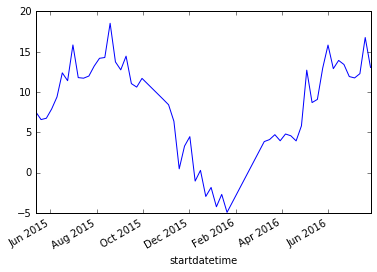

In [10]:
""" 
Code to read data from MongoDB and show data from dives
"""
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 


# Read the data from the database into a pandas dataframe
conn = MongoClient()
db = conn['saivasdata']
gabriel = db['gabrielraw']
cursor = gabriel.find()

df =  pd.DataFrame(list(cursor))

#print(df)
del df['_id']

# check that the columns are OK
#print(list(df.columns.values))

# make a special dataframe for air temperature 
air = df['airtemp']
air.index=df['startdatetime']
air2 = air.resample('7D').mean().dropna()

%matplotlib inline  
plt = air2.plot()